In [2]:
# ###################################
# Group ID : <741>
# Members : <Jon, Vasiliki, Simon>
# Date : <xx/09>
# Lecture: <3> <Parametric and nonparametric methods> (see moodle)
# Dependencies: ipykernel, numpy, pandas, matplotlib
# Python version: Latest 3.11.2
# Functionality: Short Description. Example: This script trains a MLP for classifying
# handwritten digits. It also test the performance on a given data set for various
# settings.
# ###################################

Exercise Description:

You are given, as the train data, trn_x and trn_y along with their class labels trn_x_class and trn_y_class. The task is to classify the following TEST data.
* (a) classify instances in tst_xy, and use the corresponding label file tst_xy_class to calculate the accuracy;
* (b) classify instances in tst_xy_126 by assuming a uniform prior over the space of hypotheses, and use the corresponding label file tst_xy_126_class to calculate the accuracy;
* (c) classify instances in tst_xy_126 by assuming a prior probability of 0.9 for Class x and 0.1 for Class y, and use the corresponding label file tst_xy_126_class to calculate the accuracy; compare the results with those of (b).

To plot Gaussian, you may use PLOT_GAUSSIAN_ELLIPSOID.

In [3]:
# Importing libraries and other packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [4]:
# Train data
train_x = np.loadtxt("../data/trn_x.txt")
train_x_label = np.loadtxt("../data/trn_x_class.txt")

train_y = np.loadtxt("../data/trn_y.txt")
train_y_label = np.loadtxt("../data/trn_y_class.txt")

# Test data
test_x = np.loadtxt("../data/tst_x.txt")
test_x_label = np.loadtxt("../data/tst_x_class.txt")

test_y = np.loadtxt("../data/tst_y.txt")
test_y_label = np.loadtxt("../data/tst_y_class.txt")

test_y_126 = np.loadtxt("../data/tst_y_126.txt")
test_y_126_label = np.loadtxt("../data/tst_y_126_class.txt")

test_xy = np.loadtxt("../data/tst_xy.txt")
test_xy_label = np.loadtxt("../data/tst_xy_class.txt")

test_xy_126 = np.loadtxt("../data/tst_xy_126.txt")
test_xy_126_label = np.loadtxt("../data/tst_xy_126_class.txt")

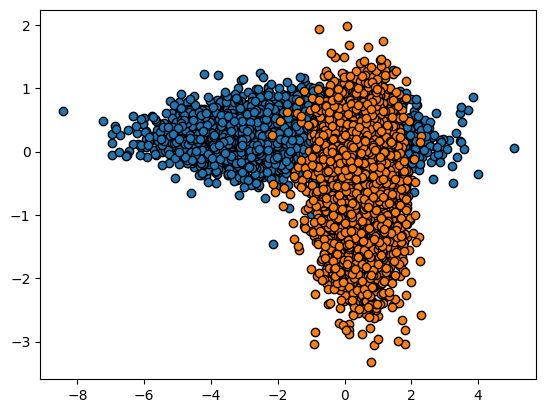

In [5]:
# Create a scatterplot of the training data
plt.scatter(train_x[:, 0], train_x[:, 1], edgecolors="k")
plt.scatter(train_y[:, 0], train_y[:, 1], edgecolors="k")
plt.show()

Exercise (a)

In [6]:
# x statistics
train_x_mean = np.mean(train_x,0)
train_x_cov = np.cov(train_x, rowvar = False)

# y statistics
train_y_mean = np.mean(train_y,0)
train_y_cov = np.cov(train_y, rowvar = False)

# priors
prior_x = len(train_x)/(len(train_x)+len(train_y))
prior_y = len(train_y)/(len(train_x)+len(train_y))

# Print out statistics + prior
print(f"train_x_mean: {train_x_mean}\ntrain_x_cov: \n{train_x_cov}\n")
print(f"train_y_mean: {train_y_mean}\ntrain_y_cov: \n{train_y_cov}\n")
print(f"priors: {prior_x, prior_y}")

train_x_mean: [-1.61931577  0.22651021]
train_x_cov: 
[[ 2.67373236 -0.00766618]
 [-0.00766618  0.07231472]]

train_y_mean: [ 0.45262897 -0.63788186]
train_y_cov: 
[[ 0.32252417 -0.02634358]
 [-0.02634358  0.52652025]]

priors: (0.5543040368330182, 0.44569596316698185)


In [7]:
# Defining the likelihood function
def likelihood(data, mean, cov):
    likelihood_value = multivariate_normal.pdf(data, mean, cov)
    return likelihood_value


In [16]:
# Compute likelihood for x, y from the test_xy data
likelihood_x = likelihood(test_xy,train_x_mean,train_x_cov)
likelihood_y = likelihood(test_xy,train_y_mean,train_y_cov)
print(f"likelihood_x: {likelihood_x}")
print(f"likelihood_y: {likelihood_y}")
print(likelihood_x.shape)

# Compute evidence (marginal likelihood)
evidence_x = (prior_x * likelihood_x)
evidence_y = (prior_y * likelihood_y)
print(evidence_x.shape)
print(evidence_y.shape)
evidence = evidence_x + evidence_y
print(f"evidence: {evidence}")

# Compute posterior probabilities 
post_x = (likelihood_x * prior_x) / evidence
post_y = (likelihood_y * prior_y) / evidence
print(f"post_x: {post_x}")
print(f"post_y: {post_y}")


# Remember that labels for x and y are are 1 and 2 respectively
classifications = []
for i in range(len(test_xy)):
    if post_x[i] > post_y[i]:
        classifications.append(1) # classify as class x
    else:
        classifications.append(2) # classify as class y

print(f"Classification: {classifications}")
    
# Calculate accuracy using labels
correct_predictions = []
for i in range(len(test_xy_label)):
    if classifications[i] == test_xy_label[i]:
        correct_predictions.append(1)
        
print(f"Correct predictions total: {sum(correct_predictions)}")

accuracy = sum(correct_predictions) / len(test_xy_label) * 100
print(f"Accuracy: {accuracy:.2f}%")


likelihood_x: [3.52557180e-01 3.38850025e-01 2.97951981e-01 ... 4.99911518e-04
 5.88685245e-09 5.64828675e-10]
likelihood_y: [2.49252204e-05 6.24497823e-04 3.31549282e-02 ... 2.24627945e-02
 2.32001389e-01 1.07402862e-01]
(2027,)
(2027,)
(2027,)
(2027,)
evidence: [0.19543498 0.18810427 0.179933   ... 0.01028868 0.10340209 0.04786902]
post_x: [9.99943157e-01 9.98520309e-01 9.17874890e-01 ... 2.69328016e-02
 3.15574492e-08 6.54048903e-09]
post_y: [5.68427938e-05 1.47969078e-03 8.21251098e-02 ... 9.73067198e-01
 9.99999968e-01 9.99999993e-01]
Classification: [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

C:\Users\simon\AppData\Local\Temp\ipykernel_22504\3232272947.py:18: RuntimeWarning: invalid value encountered in divide
  post_x = (likelihood_x * prior_x) / evidence
C:\Users\simon\AppData\Local\Temp\ipykernel_22504\3232272947.py:19: RuntimeWarning: invalid value encountered in divide
  post_y = (likelihood_y * prior_y) / evidence


Exercise (b)

In [9]:
# Defining the priors
prior_x_uniform = 0.5
prior_y_uniform = 0.5

# Computing likelihood
likelihood_x_uniform = likelihood(test_xy_126,train_x_mean,train_x_cov)
likelihood_y_uniform = likelihood(test_xy_126,train_y_mean,train_y_cov)
print(f"likelihood_x_uniform: {likelihood_x_uniform}")
print(f"likelihood_y_uniform: {likelihood_y_uniform}")

# Compute evidence (marginal likelihood)
evidence_x_uniform = (prior_x_uniform * likelihood_x_uniform)
evidence_y_uniform = (prior_y_uniform * likelihood_y_uniform)
evidence_uniform = evidence_x_uniform + evidence_y_uniform
print(f"evidence_uniform: {evidence_uniform}")

# Compute posterior probabilities 
post_x_uniform = (likelihood_x_uniform * prior_x_uniform) / evidence_uniform
post_y_uniform = (likelihood_y_uniform * prior_y_uniform) / evidence_uniform
print(f"post_x: {post_x_uniform}")
print(f"post_y: {post_y_uniform}")


# Remember that labels for x and y are are 1 and 2 respectively
classifications = []
for i in range(len(test_xy_126)):
    if post_x_uniform[i] > post_y_uniform[i]:
        classifications.append(1) # classify as class x
    else:
        classifications.append(2) # classify as class y

print(f"Classification: {classifications}")
    
# Calculate accuracy using labels
correct_predictions = []
for i in range(len(test_xy_126_label)):
    if classifications[i] == test_xy_126_label[i]:
        correct_predictions.append(1)
        
print(f"Correct predictions total: {sum(correct_predictions)}")

accuracy_uniform = sum(correct_predictions) / len(test_xy_126_label) * 100
print(f"Accuracy: {accuracy_uniform:.2f}%")

likelihood_x_uniform: [3.52557180e-01 3.38850025e-01 2.97951981e-01 ... 3.60479993e-05
 6.99080271e-06 2.44430631e-02]
likelihood_y_uniform: [2.49252204e-05 6.24497823e-04 3.31549282e-02 ... 2.33118512e-01
 1.81989801e-01 2.78034645e-01]
evidence_uniform: [0.17629105 0.16973726 0.16555345 ... 0.11657728 0.0909984  0.15123885]
post_x: [9.99929307e-01 9.98160399e-01 8.99866396e-01 ... 1.54609883e-04
 3.84116809e-05 8.08094693e-02]
post_y: [7.06933790e-05 1.83960145e-03 1.00133604e-01 ... 9.99845390e-01
 9.99961588e-01 9.19190531e-01]
Classification: [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1

C:\Users\simon\AppData\Local\Temp\ipykernel_22504\2927581888.py:18: RuntimeWarning: invalid value encountered in divide
  post_x_uniform = (likelihood_x_uniform * prior_x_uniform) / evidence_uniform
C:\Users\simon\AppData\Local\Temp\ipykernel_22504\2927581888.py:19: RuntimeWarning: invalid value encountered in divide
  post_y_uniform = (likelihood_y_uniform * prior_y_uniform) / evidence_uniform


Exercise (c)

In [10]:
# Defining the priors
prior_x_non_uniform = 0.9
prior_y_non_uniform = 0.1

# Computing likelihood
likelihood_x_non_uniform = likelihood(test_xy_126,train_x_mean,train_x_cov)
likelihood_y_non_uniform = likelihood(test_xy_126,train_y_mean,train_y_cov)
print(f"likelihood_x_non_uniform: {likelihood_x_non_uniform}")
print(f"likelihood_y_non_uniform: {likelihood_y_non_uniform}")

# Compute evidence (marginal likelihood)
evidence_x_non_uniform = (prior_x_non_uniform * likelihood_x_non_uniform)
evidence_y_non_uniform = (prior_y_non_uniform * likelihood_y_non_uniform)
evidence_non_uniform = evidence_x_non_uniform + evidence_y_non_uniform
print(f"evidence_uniform: {evidence_non_uniform}")

# Compute posterior probabilities 
post_x_non_uniform = (likelihood_x_non_uniform * prior_x_non_uniform) / evidence_non_uniform
post_y_non_uniform = (likelihood_y_non_uniform * prior_y_non_uniform) / evidence_non_uniform
print(f"post_x: {post_x_non_uniform}")
print(f"post_y: {post_y_non_uniform}")


# Remember that labels for x and y are are 1 and 2 respectively
classifications = []
for i in range(len(test_xy_126)):
    if post_x_non_uniform[i] > post_y_uniform[i]:
        classifications.append(1) # classify as class x
    else:
        classifications.append(2) # classify as class y

print(f"Classification: {classifications}")
    
# Calculate accuracy using labels
correct_predictions = []
for i in range(len(test_xy_126_label)):
    if classifications[i] == test_xy_126_label[i]:
        correct_predictions.append(1)
        
print(f"Correct predictions total: {sum(correct_predictions)}")

accuracy_non_uniform = sum(correct_predictions) / len(test_xy_126_label) * 100
print(f"Accuracy: {accuracy_non_uniform:.2f}%")

likelihood_x_non_uniform: [3.52557180e-01 3.38850025e-01 2.97951981e-01 ... 3.60479993e-05
 6.99080271e-06 2.44430631e-02]
likelihood_y_non_uniform: [2.49252204e-05 6.24497823e-04 3.31549282e-02 ... 2.33118512e-01
 1.81989801e-01 2.78034645e-01]
evidence_uniform: [0.31730395 0.30502747 0.27147228 ... 0.02334429 0.01820527 0.04980222]
post_x: [9.99992145e-01 9.99795265e-01 9.87786993e-01 ... 1.38976997e-03
 3.45598928e-04 4.41722401e-01]
post_y: [7.85531351e-06 2.04734943e-04 1.22130071e-02 ... 9.98610230e-01
 9.99654401e-01 5.58277599e-01]
Classification: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

C:\Users\simon\AppData\Local\Temp\ipykernel_22504\114805236.py:18: RuntimeWarning: invalid value encountered in divide
  post_x_non_uniform = (likelihood_x_non_uniform * prior_x_non_uniform) / evidence_non_uniform
C:\Users\simon\AppData\Local\Temp\ipykernel_22504\114805236.py:19: RuntimeWarning: invalid value encountered in divide
  post_y_non_uniform = (likelihood_y_non_uniform * prior_y_non_uniform) / evidence_non_uniform


Comparing accuracy of (b) and (c)

In [11]:
improvement = (accuracy_non_uniform / accuracy_uniform) - 1
print(f"Absolute improvement in accuracy {improvement*100:.2f}%")

Absolute improvement in accuracy 8.39%
